<a href="https://colab.research.google.com/github/jeungsengho/python8month/blob/main/15_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98%EB%A1%9C_%EB%AA%A8%EB%8D%B8_%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 손글씨 데이터셋을 내려받음
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
# 데이터로더 생성
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
  print('Shape of X [N, C, H, W]: ', X.shape)
  print('Shape of y: ', y.shape, y.dtype)
  print(y)
  break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3])


In [4]:
# 학습에 사용할 CPU장치나 GPU장치를 얻음
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('사용 중인 디바이스: {}'.format(device))

사용 중인 디바이스: cuda


In [5]:
# 모델을 정의
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()  # 행렬로 데이터가 존재할 때 그 데이터를 1차원 데이터로 바꿔줌 -> 일렬로 만들어준다
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


In [6]:
# Linear(in_features=784, out_features=128(157-128=?), bias=True)
# bias=True: 해당 in_features, out_features에 의해 layer는 bias추가하여 자동으로 학습함

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [7]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [8]:
# Training을 위한 함수

def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    # 예측 오류 계산
    pred = model(X)
    loss = loss_fn(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)
      print(f'loss: {loss:>7f} [{current:>5d}/{size:>5d}]')

In [9]:
epochs = 10
for t in range(epochs):
  print(f'Epoch {t+1}\-------------------')
  train(train_dataloader, model, loss_fn, optimizer)
print('끝!')

Epoch 1\-------------------
loss: 2.307804 [    0/60000]
loss: 0.431195 [ 6400/60000]
loss: 0.297033 [12800/60000]
loss: 0.411578 [19200/60000]
loss: 0.215818 [25600/60000]
loss: 0.399328 [32000/60000]
loss: 0.143597 [38400/60000]
loss: 0.361157 [44800/60000]
loss: 0.209495 [51200/60000]
loss: 0.348565 [57600/60000]
Epoch 2\-------------------
loss: 0.162498 [    0/60000]
loss: 0.209024 [ 6400/60000]
loss: 0.139814 [12800/60000]
loss: 0.249018 [19200/60000]
loss: 0.181471 [25600/60000]
loss: 0.267940 [32000/60000]
loss: 0.095444 [38400/60000]
loss: 0.260887 [44800/60000]
loss: 0.166428 [51200/60000]
loss: 0.261858 [57600/60000]
Epoch 3\-------------------
loss: 0.094313 [    0/60000]
loss: 0.185237 [ 6400/60000]
loss: 0.092770 [12800/60000]
loss: 0.200610 [19200/60000]
loss: 0.116777 [25600/60000]
loss: 0.250793 [32000/60000]
loss: 0.052709 [38400/60000]
loss: 0.173421 [44800/60000]
loss: 0.140538 [51200/60000]
loss: 0.199167 [57600/60000]
Epoch 4\-------------------
loss: 0.087841 [  

In [10]:
# Test을 위한 함수
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, current = 0, 0

    # autograd를 사용하지 않음으로 메모리 사용량을 줄이고 연산 속도를 높임
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            current += (pred.argmax(1) == y).type(torch.float).sum().item()
        test_loss /= num_batches
        current /= size
        print(f'Test Error: \n Accuracy: {(100*current):>0.1f}%, Avg loss: {test_loss:>8f} \n')

In [11]:
epochs = 10
for t in range(epochs):
  print(f'Epoch {t+1}\-------------------')
  train(train_dataloader, model, loss_fn, optimizer)
  test(train_dataloader, model, loss_fn)
print('끝!')

Epoch 1\-------------------
loss: 0.038058 [    0/60000]
loss: 0.028804 [ 6400/60000]
loss: 0.024435 [12800/60000]
loss: 0.013846 [19200/60000]
loss: 0.022591 [25600/60000]
loss: 0.050915 [32000/60000]
loss: 0.024367 [38400/60000]
loss: 0.081488 [44800/60000]
loss: 0.096300 [51200/60000]
loss: 0.059128 [57600/60000]
Test Error: 
 Accuracy: 99.3%, Avg loss: 0.024929 

Epoch 2\-------------------
loss: 0.016293 [    0/60000]
loss: 0.012444 [ 6400/60000]
loss: 0.016920 [12800/60000]
loss: 0.027221 [19200/60000]
loss: 0.012868 [25600/60000]
loss: 0.021866 [32000/60000]
loss: 0.007458 [38400/60000]
loss: 0.021344 [44800/60000]
loss: 0.058424 [51200/60000]
loss: 0.007179 [57600/60000]
Test Error: 
 Accuracy: 99.5%, Avg loss: 0.016948 

Epoch 3\-------------------
loss: 0.013908 [    0/60000]
loss: 0.006117 [ 6400/60000]
loss: 0.013563 [12800/60000]
loss: 0.023274 [19200/60000]
loss: 0.005721 [25600/60000]
loss: 0.010439 [32000/60000]
loss: 0.005411 [38400/60000]
loss: 0.013575 [44800/60000]


In [13]:
import os
from PIL import Image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('file:{name}, length:{length}bytes'.format(name=fn, length=len(uploaded[fn])))

Saving 2.png to 2.png
file:2.png, length:641bytes


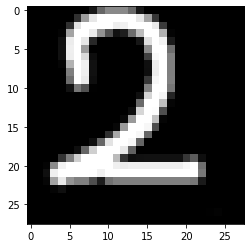

In [16]:
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, '2.png')

cur_img = Image.open(img_path)
cur_img = cur_img.resize((28, 28))
image = np.asarray(cur_img)

try:
  image = np.mean(image, axis=2)  # axis=2 -> 컬러값
except:
  pass

image = np.abs(255-image)
image = image.astype(np.float32) / 255. # 0 ~ 1 사이의 소수 -> 정규화(이미지의 숫자의 척도를 맞춰주기 위해서)
plt.imshow(image, cmap='gray')
plt.show()

In [20]:
image = torch.as_tensor(image).to(device).reshape(1, 1, 28, 28)
model.eval() # 모든 레이어가 evaluation mode로 변경: 학습할 때만 필요한 Dropout, Batchnorm 등의 기능을 비활성화 
             # 실행 단계에서 퍼포먼스를 조금 더 높이기 위해 사용
predict = model(image)
print(f'model이 예측한 값: {predict.argmax(1).item()}')

model이 예측한 값: 2


In [12]:
# 퍼셉트론(Perceptron)
# 초기 형태의 인공 신경망으로 다수의 입력으로부터 하나의 결과를 내보내는 알고리즘

# 1. 순전파(foward propagation)

* 순전파는 입력 받은 데이터를 각 가중치와 곱하여 출력을 뽑아내는 과정
* 입력층부터 차례로 계산해가며 출력층까지 나아감

# 2. 역전파(backpropagation)

* 순전파의 반대방향으로 전파시키는 방법
* 출력층으로부터 입력층까지 역으로 나감

* 역전파의 순서
  1. 주어진 입력값에 상관없이 임의 초기 가중치를 준 뒤 은닉층을 거쳐 결과를 계산(순전파)
  2. 계산 결과와 실제 예측하고자 하는 값 사이의 오차를 구함(loss function)
  3. 계산식의 반대로 돌아가며(미분) 가중치를 업데이트(역전파)
  4. 1~3의 과정을 오차가 더 이상 줄지 않을 때까지 반복(에폭)

### 2-1. 경사하강법
* 딥러닝 알고리즘 학습시 사용되는 최적화 방법(Optimizer)
* 경사하강법의 종류
  1. 배치 경사 하강법(Batch Gradient Descent)
    - 가장 기본적인 경사 하강법으로 Vanilla Gradient Descent라고 부름
    - 데이터셋 전체를 고려하여 손실함수를 계산
    - 한번의 Epoch에 모든 파라미터 업데이트를 단 한번만 수행
    - 모델 학습시 많은 시간과 메모리가 필요하다는 단점
  
  2. 확률적 경사 하강법(Stochastic Gradient Descent)
    - 배치 경사 하강법의 단점을 개선하기 위해 제안
    - Batch size를 1로 설정하여 파라미터를 업데이트하기 때문에 훨씬 빠르고 적은 메모리로 학습이 진행
    - 파라미터 값의 업데이트 폭이 불안정하기 때문에 정확도가 낮은 경우가 생기기도 함
  
  3. 미니 배치 경사 하강법(Mini-Batch Gradient Descent)
    - 일반적으로 배치사이즈를 32, 64, 128과 같이 2의 n제곱에 해당하는 값으로 설정하고 적용하는 방법
    - 모델 학습 속도가 빠르고, 확률적 경사 하강법보다 안정적인 장점
  
  4. Momentum
    - 운동량을 의미하며 매개변수의 이동에 속도를 부여하는 것을 의미
    - 매개변수를 갱신할 때마다 기존속도에 매개변수의 기울기값을 추가하고 이 속도값을 다시 매개변수에 추가하여 매개변수를 이동
    - SGD가 가지고 있는 문제인 local Minima를 해결할 수 있는 방법
  
  5. Nesterov Momentum
    - 현재의 속도 벡터와 현재 속도로 한 걸음 미리 가본 위치의 그레디언트 벡터를 더해 다음 위치를 정함
    - 속도 Vt+1는 현재 속도에 마찰계수(p)를 곱한 뒤 한 걸음 미리 가 본 위치의 그레디언트를 빼서 계산
    - 오버슈팅을 막기 위해 현재 속도로 한 걸음 미리 가 보고 오버슈팅이 된 만큼 다시 내리막길로 내려가는 방식

  6. AdaGrad
    - Adaptive Gradient의 줄임말
    - 손실 함수 곡면의 변화에 따라 적응적으로 학습률을 정하는 알고리즘
    - 손실 함수 경사가 가파를 때 큰 폭으로 이동하면 최적화 경로를 벗어나서 최소 지점을 지나갈 수 있음
    - 많이 변화한 변수는 최적해에 근접했을거란 가정하에 작은 크기로 이동하면서 세밀하게 값을 조정하고 반대로 적게 변화한 변수들은 학습률을 크게하여 빠르게 오차값을 줄이고자 하는 방법
  
  7. RMSProp
    - AdaGrad에서 학습이 안되는 문제를 해결하기 위해 hyper parameter인 β가 추가
    - 변화량이 더 클수록 학습률이 작아져서 조기 종료되는 문제를 해결하기 위해 학습률 크기를 비율로 조절할 수 있도록 제안된 방법

  8. Adam
    - Adam은 Momentum과 RMSProp이 합쳐진 형태
    - 진행하던 속도에 관성도 주고, 최근 경로의 곡면의 변화량에 따른 적응적 학습률을 갖는 알고리즘
    - 매우 넓은 범위의 아키텍처를 가진 서로 다른 신경망에서 잘 작동한다는 것이 증명됨

### 2-2. 활성화 함수
* Activation function이라고 부르며 신경망의 출력을 결정하는 식
* 신경망에서는 뉴런(노드)에 연산 값을 계속 전달해주는 방식으로 가중치를 훈련하고 예측 -> 각각의 함수는 네트워크의 각 뉴런에 연결되어 있으면 각 뉴런의 입력이 모델의 예측과 관련이 있는지 여부에 따라 활성화 -> 활성화를 통해 신경망은 입력값에서 필요한 정보를 학습
* 훈련 과정에서 계산량이 많고 역전파에서 사용해야 하므로 연산의 대한 효율성이 매우 중요

* 활성화 함수의 종류
  1. Binary step function
    - 퍼셉트론 알고리즘에서 활성화 함수로 사용
    - 다중 분류 문제에서 다중 출력을 할 수 없다는 단점
  
  2. Linear activation function
    - 선형 활성화 함수
    - 입력값에 특정 상수값을 곱한 값을 출력으로 가짐
    - 다중 출력이 가능
    - 역전파에 사용이 불가능
    - 선형함수를 여러번 사용하는 것은 마지막에 선형함수를 한번 쓰는 것과 같음

  3. Non-linear activation function
    - 최근 신경망 모델에서 대부분 사용
    - 입력과 출력간의 복잡한 관게를 만들어 입력에서 필요한 정보를 얻음
    - 입력과 관련있는 미분값을 얻으면 역전파를 가능

* Non-linear activation function의 종류
  1. Sigmoid
    - 로지스틱으로도 불리는 s자 형태의 함수
    - 입력값이 커질수록 1로 수렴하고, 입력값이 작을수록 0에 수렴
    - 역전파시 Vanishing Gradient 문제가 발생
    - 출력의 중심이 0이 아님. 비용/효율면에서 좋지 못함
    - 퍼셉트론, 초기 신경망에서 많이 사용했지만 여러 단점들 때문에 현재는 많이 사용하지 않음

    2. ReLU
      - Rectified Linear Unit 함수의 준말로 개선 선형 함수라고 부름
      - CNN에서 좋은 성능을 보였고, 현재 딥러닝에서 가장 많이 사용하는 활성화 함수
      - 비선형. 도함수를 가지며, 역전파를 허용
      - 입력값이 0 또는 음수일 때 gradient값은 0이 되며 이 경우 학습을 하지 못함
    
    3. softmax
      - 다중 분류 문제를 해결하기 위해 많이 사용되는 함수
      - 입력받은 값을 0에서 1사이의 값으로 모두 정규화하며 출력값이 여러개임
      - 출력값의 총합은 항상 1이 되는 특징을 가짐
      - 지수함수를 사용하여 오버플로 발생이 가능

## 3. FashionMNIST DataSet

In [21]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



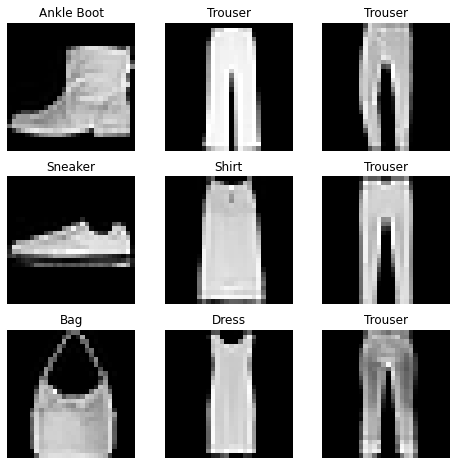

In [22]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap='gray') # .squeeze 뒤에 있는 채널을 삭제
plt.show()

In [28]:
# DataLoader 만들기
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
labels batch shape: torch.Size([64])


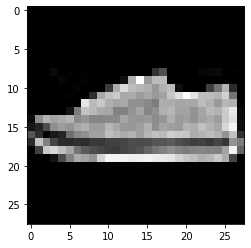

Label: 7


In [40]:
train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape: {train_features.size()}')
print(f'labels batch shape: {train_labels.size()}')

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label: {label}')

In [39]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'사용하는 디바이스: {device}')

사용하는 디바이스: cuda


In [41]:
# Model class 만들기
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28 * 28, 128),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(128, 10)
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

In [42]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [43]:
# 가상의 데이터를 만들어서 예측
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f'예측된 클래스: {y_pred}')

예측된 클래스: tensor([5], device='cuda:0')


In [44]:
loss_fn = nn.CrossEntropyLoss()

In [45]:
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [47]:
def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader, dataset)
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    pred = model(X)
    loss = loss_fn(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)
      print(f'loss:{loss:>7f} [{current:>5d}/{size:>5d}]')

In [48]:
def test_loop(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, current = 0, 0

  model.eval()

  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      current += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    current /= size
    print(f'Test Error: \n Accuracy:{(100*current):>0.1f}%, Avg loss: {test_loss:8f} \n')

In [49]:
# 학습
epochs = 10

for t in range(epochs):
  print(f'Epoch {t+1}\-------------------')
  train(train_dataloader, model, loss_fn, optimizer)
  test(test_dataloader, model, loss_fn)

print('끝!')

Epoch 1\-------------------
loss: 2.326645 [    0/60000]
loss: 0.625295 [ 6400/60000]
loss: 0.746934 [12800/60000]
loss: 0.597534 [19200/60000]
loss: 0.401116 [25600/60000]
loss: 0.576656 [32000/60000]
loss: 0.391974 [38400/60000]
loss: 0.323733 [44800/60000]
loss: 0.335396 [51200/60000]
loss: 0.207599 [57600/60000]
Test Error: 
 Accuracy: 84.0%, Avg loss: 0.452216 

Epoch 2\-------------------
loss: 0.370995 [    0/60000]
loss: 0.411884 [ 6400/60000]
loss: 0.411404 [12800/60000]
loss: 0.394948 [19200/60000]
loss: 0.396823 [25600/60000]
loss: 0.407839 [32000/60000]
loss: 0.369385 [38400/60000]
loss: 0.305545 [44800/60000]
loss: 0.437090 [51200/60000]
loss: 0.242167 [57600/60000]
Test Error: 
 Accuracy: 85.5%, Avg loss: 0.403332 

Epoch 3\-------------------
loss: 0.220248 [    0/60000]
loss: 0.326826 [ 6400/60000]
loss: 0.352674 [12800/60000]
loss: 0.316798 [19200/60000]
loss: 0.280496 [25600/60000]
loss: 0.234512 [32000/60000]
loss: 0.265355 [38400/60000]
loss: 0.542491 [44800/60000]


In [50]:
# 학습된 model parameter 저장
torch.save(model.state_dict(), 'model_weights.pth')

In [51]:
# 새로운 model을 생성
model2 = NeuralNetwork().to(device)
print(model2)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [52]:
# 테스트
model2.eval()
test_loop(test_dataloader, model2, loss_fn)

Test Error: 
 Accuracy:9.1%, Avg loss: 2.303278 



In [53]:
# 저장된 parameter 불러오기
model2.load_state_dict(torch.load('model_weights.pth'))
model2.eval()
test_loop(test_dataloader, model2, loss_fn)

Test Error: 
 Accuracy:88.2%, Avg loss: 0.340350 



In [54]:
# model 전체를 저장하고 불러오기
torch.save(model, 'model.pth')

In [55]:
# 불러오기
model3 = torch.load('model.pth')

In [56]:
# 테스트
model3.eval()
test_loop(test_dataloader, model3, loss_fn)

Test Error: 
 Accuracy:88.2%, Avg loss: 0.339667 

